# Colormpas in Seaborn and Matplotlib

Both Matplotlib provides several function to design colormaps. 
Here I will show some examples of easy to use functions available for Seaborn (similar functionalities in Matplotlib is described [here](https://matplotlib.org/users/colormaps.html)).

## Table of Contents

* [Essentials](#Essentials)
* [Categorical Colormaps](#Categorical-Colormaps)
* [Sequential Colormaps](#Sequential-Colormaps)
* [Diverging Colormaps](#Diverging-Colormaps)

## Essentials

### [color_palette()](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

In [ ]:
import seaborn as sns

#without arguments it returns the current default palette
palette = sns.color_palette()  #palette is returned as a sequence of RGB tuples (with values between 0 and 1)
print(palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


More conveniently, palplot() function renders the palette 

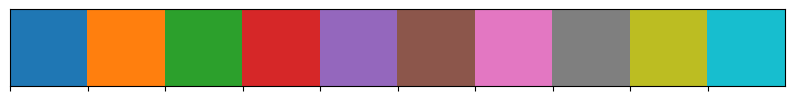

In [ ]:
sns.palplot(palette) 

It is possible to create a palette from a list of colors:

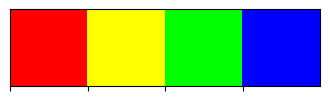

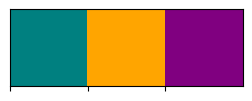

In [ ]:
palette = sns.color_palette([(1,0,0),(1,1,0),(0,1,0),(0,0,1)])
sns.palplot(palette)
palette2 = sns.color_palette(['teal', 'orange', 'purple'])
sns.palplot(palette2)

You can also load one of the existing palettes by specifying its name (from this [list](https://matplotlib.org/gallery/color/colormap_reference.html)) as argument:

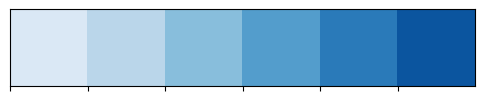

In [ ]:
palette = sns.color_palette('Blues') #return the palette Blues
sns.palplot(palette)

By default standard palette are returned with six colors, but you can specify a different numbers of colors to be returned:

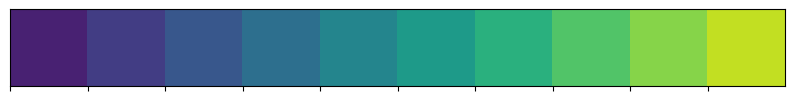

In [ ]:
palette = sns.color_palette('viridis',10) #return the palette Viridis
sns.palplot(palette)

### Using palette for a plot

Let see an example of using a palette in seaborn:

In [ ]:
!wget https://www.dropbox.com/s/pvhrql9mbczz69y/iris.csv?dl=0 -O iris.csv

--2023-04-03 19:59:55--  https://www.dropbox.com/s/pvhrql9mbczz69y/iris.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pvhrql9mbczz69y/iris.csv [following]
--2023-04-03 19:59:55--  https://www.dropbox.com/s/raw/pvhrql9mbczz69y/iris.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc504b4e1fdc6b2c7ea423873761.dl.dropboxusercontent.com/cd/0/inline/B5fvPKfzAF7JVF_RGGf_yPDBMzaaZQIO8Jv4cwIq5uZPODYTSdpTrB7RhmNDNe5r2RKofxihVivPpjP-bReBYsX92eDqZ_2atGcNmVOvIM937WVK8jG-o_4dLdu8ISBltsUM6LSzAlcIe_CunV31BA5srbYr3ZseInAYX12BaWM_UQ/file# [following]
--2023-04-03 19:59:55--  https://uc504b4e1fdc6b2c7ea423873761.dl.dropboxusercontent.com/cd/0/inline/B5fvPKfzAF7JVF_RGGf_yPDBMzaaZQIO8Jv4cwIq5uZPODYTSdpTrB7RhmNDNe5r2RKofxihVivPpjP-bReBYsX

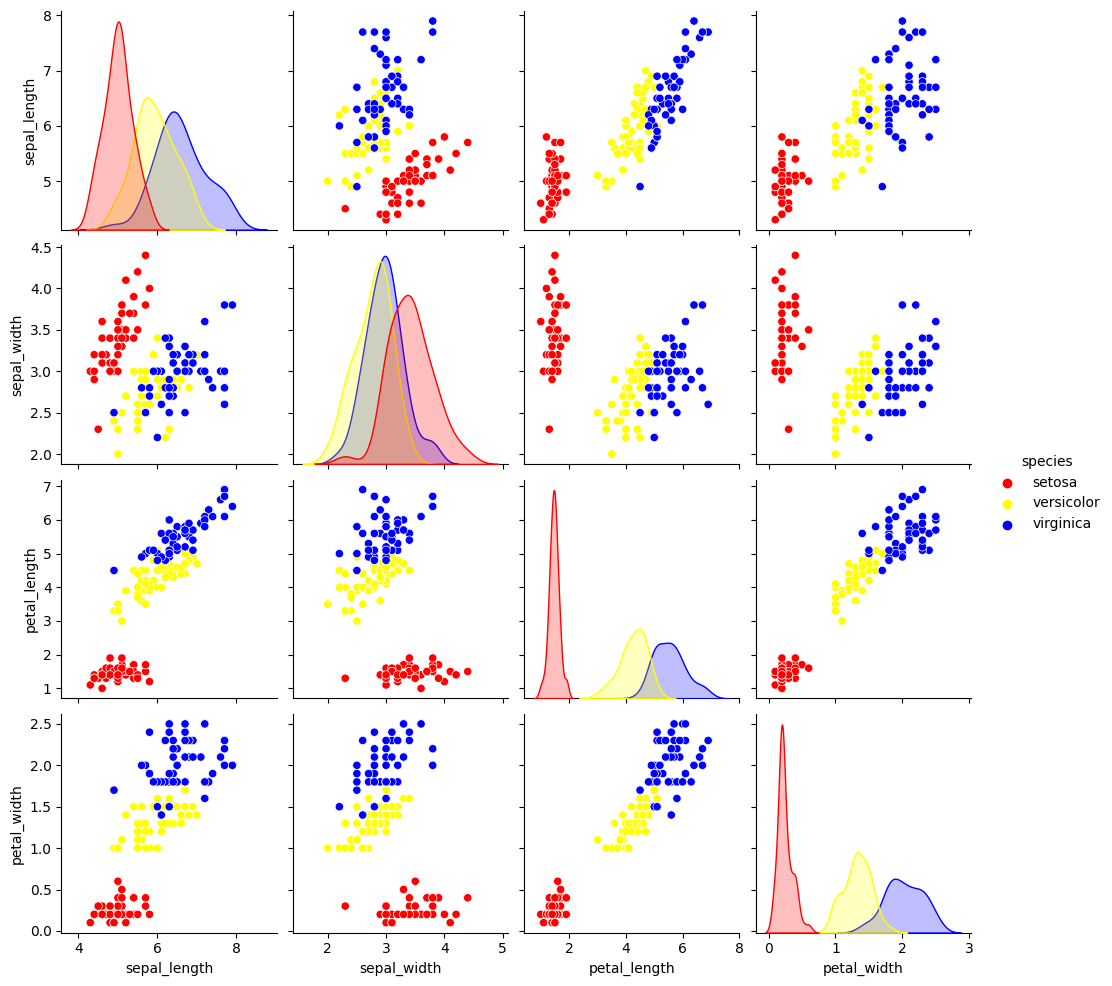

In [ ]:
import pandas as pd
import seaborn as sns


data = pd.read_csv('iris.csv')
mypalette = sns.color_palette([(1,0,0),(1,1,0),(0,0,1)]) #my palette with red, green and blue colors 
sns.pairplot(data, hue='species',palette=mypalette) #plot using mypalette

You can set the default palette to a custom one (to avoid explictly specifying it anytime) with [set_palette()](https://seaborn.pydata.org/generated/seaborn.set_palette.html#seaborn.set_palette) function:

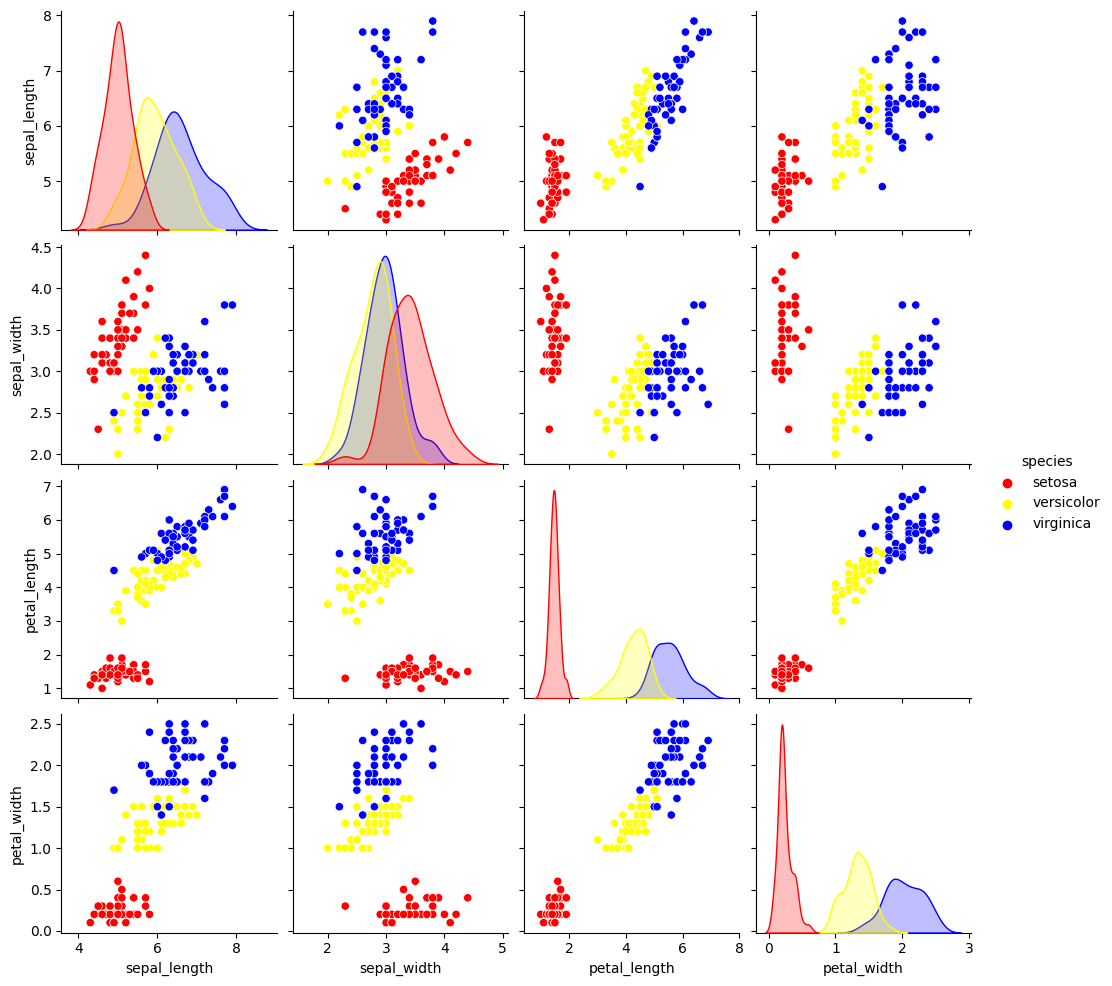

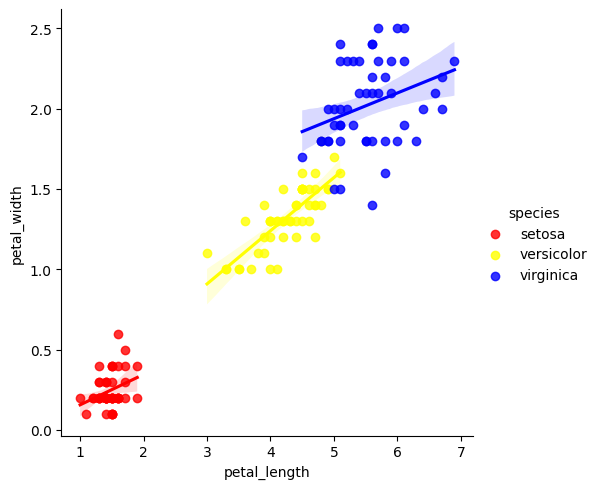

In [ ]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('iris.csv')
mypalette = sns.color_palette([(1,0,0),(1,1,0),(0,0,1)]) #my palette with red, green and blue colors 
sns.set_palette(mypalette) #set default palette to mypalette
sns.pairplot(data, hue='species') #pairplot
sns.lmplot(data,x='petal_length',y='petal_width', hue='species') #lmplot

We have a similar behavior with Matplotlib:

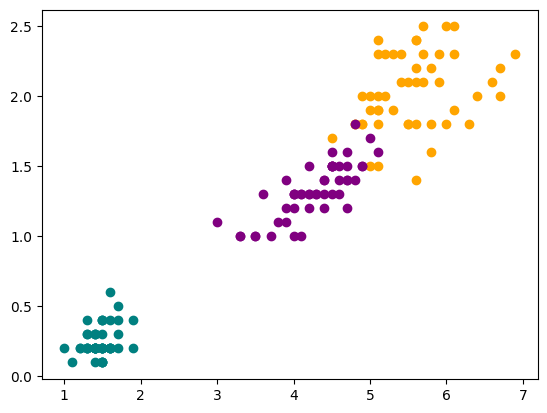

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('iris.csv')
mypalette = sns.color_palette(['teal', 'orange', 'purple'])
sns.set_palette(mypalette)
plt.plot(data[data.species == 'setosa']['petal_length'],data[data.species == 'setosa']['petal_width'],'o')
plt.plot(data[data.species == 'virginica']['petal_length'],data[data.species == 'virginica']['petal_width'],'o')
plt.plot(data[data.species == 'versicolor']['petal_length'],data[data.species == 'versicolor']['petal_width'],'o')

## Categorical Colormaps

### Evenly-spaced colormaps

It is possible to create evenly-spaced colormap in both HSL space and [HUSL](http://www.hsluv.org/) space:

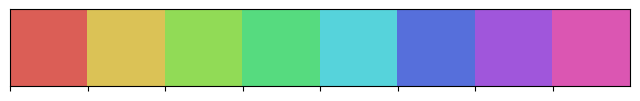

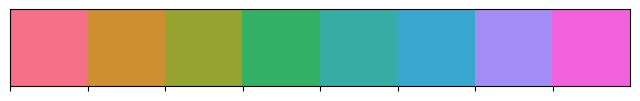

In [ ]:
mypalette = sns.color_palette("hls", 8)
sns.palplot(mypalette)
mypalette = sns.color_palette("husl", 8)
sns.palplot(mypalette)

You can customize starting hue, lightness and saturation levels with the dedicated function [husl_palette()](https://seaborn.pydata.org/generated/seaborn.husl_palette.html#seaborn.husl_palette):

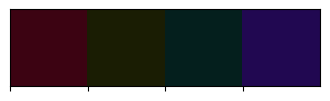

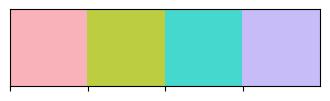

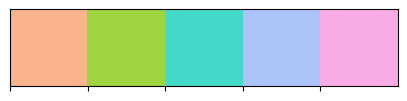

In [ ]:
mypalette = sns.husl_palette(4, l=.1)
sns.palplot(mypalette)
mypalette = sns.husl_palette(4, l=.8, s=.9)
sns.palplot(mypalette)
mypalette = sns.husl_palette(5, h=.1, l=.8)
sns.palplot(mypalette)


### Color Brewer palettes

You can load [Color Brewer](http://colorbrewer2.org/) palettes:

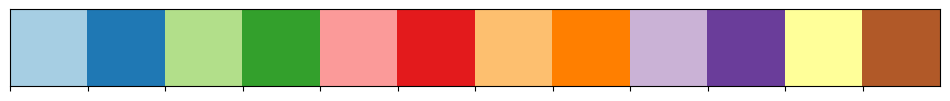

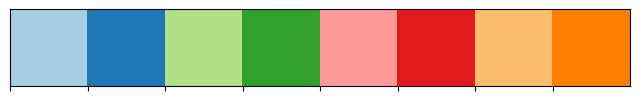

In [ ]:
sns.palplot(sns.color_palette("Paired"))
sns.palplot(sns.color_palette("Paired",8))

## Sequential Colormaps 

### Color Brewer palettes

With color_palette() function, it is possible to load Color Brewer palettes:

The Color Brewer library has a great set of these palettes. They're named after the dominant color (or colors) in the palette.

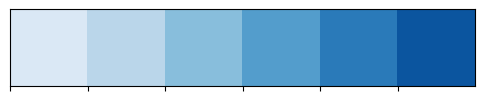

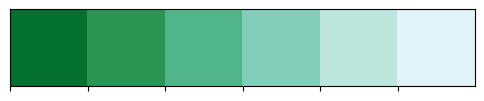

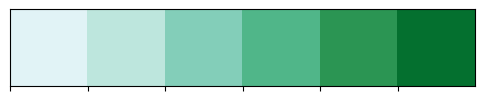

In [ ]:
sns.palplot(sns.color_palette('Blues'))
sns.palplot(sns.color_palette('BuGn_r')) #with _r you get the reverse palette
sns.palplot(sns.color_palette('BuGn')) # with _d you get the darker version

The color_palette() function returns just a list of colors, but some plotting function requires a [Matplotlib Colormap](https://matplotlib.org/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap) to map continuous values to colors.
In order to get such Colormap object, the pyplot function [get_cmap()](??) can be used instead of color_palette():

In [ ]:
import matplotlib.pyplot as plt

mycmap = plt.get_cmap('GnBu') #same names used for color_palette(); supports _r but not _d suffix

### Cubehelix palettes
The function [cubehelix_palette()](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette) generates maps with linearly-decreasing maps while rotating the color hue:

sns.palplot(sns.cubehelix_palette(8))
sns.palplot(sns.cubehelix_palette(8, start=.5)) #change starting hue (from 0 to 3)
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=.75)) #change rotations around hue (from 0 to 1)

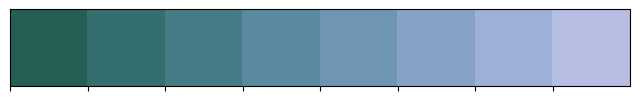

In [ ]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0.4, dark=0.3, light=.75, reverse=True))

You can also get a colormap:

In [ ]:
mycmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

### Custom palettes

For a simpler interface to custom sequential palettes, you can use light_palette() dark_palette() functions:

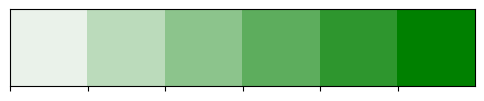

In [ ]:
sns.palplot(sns.light_palette('green'))

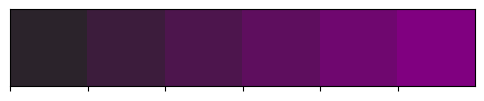

In [ ]:
sns.palplot(sns.dark_palette('purple'))

They can also be used to create colormap objects rather than lists of colors:

In [ ]:
mypal = sns.dark_palette("palegreen", as_cmap=True)

## Diverging Colormaps

### Color Brewer Palettes

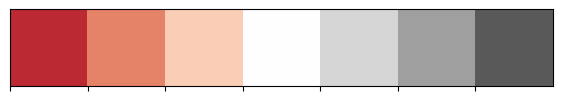

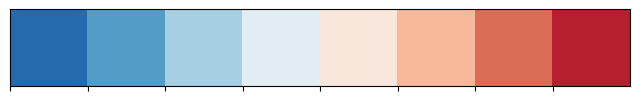

In [ ]:
sns.palplot(sns.color_palette('RdGy', 7))
sns.palplot(sns.color_palette("RdBu_r", 8))

### Custom palettes

You can also use the seaborn [function diverging_palette()](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html#seaborn.diverging_palette) to create a custom colormap for diverging data. 
This function makes diverging palettes using the ``husl`` color system. You pass it two hues (in degrees) and, optionally, the lightness and saturation values for the extremes.

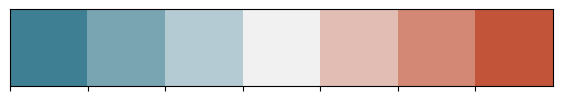

In [ ]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

The ´´s´´ and ´´l´´ parameters allow to set saturation and lightness at extremes of the palette:

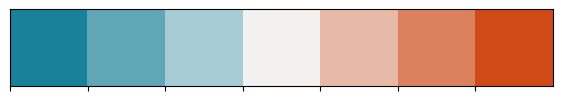

In [ ]:
sns.palplot(sns.diverging_palette(220, 20, s=95, l=50, n=7))

The ``sep`` argument controls the width of the separation between the two ramps in the middle region of the palette:

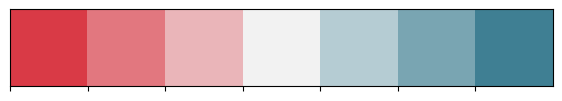

In [ ]:
sns.palplot(sns.diverging_palette(10, 220, sep=3, n=7))

It's also possible to make a palette with the midpoint is dark rather than light.

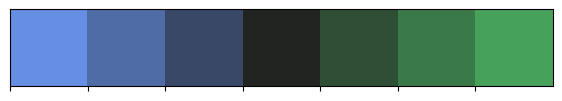

In [ ]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))